# Banking Domain (Classification Problem)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Importing all the csv files 

In [2]:
geo = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\BANKING\Geo_scores.csv')
instance = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\BANKING\instance_scores.csv')
lamda = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\BANKING\Lambda_wts.csv')
qset = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\BANKING\Qset_tats.csv')
train = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\BANKING\train.csv')
test = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\BANKING\test_share.csv')

## shape of dataset 

In [3]:
print('Geo ',geo.shape)
print('*********************')
print('instance ',instance.shape)
print('*********************')
print('lamda ',lamda.shape)
print('*********************')
print('qset ',qset.shape)
print('*********************')
print('test  ',test.shape)
print('*********************')
print('train ',train.shape)
print('*********************')

Geo  (1424035, 2)
*********************
instance  (1424035, 2)
*********************
lamda  (1400, 2)
*********************
qset  (1424035, 2)
*********************
test   (56962, 27)
*********************
train  (227845, 28)
*********************


## Data look like (.head)

In [4]:
print('Geo \n',geo.head(2))
print('*********************')
print('instance \n',instance.head(2))
print('*********************')
print('lamda \n',lamda.head(2))
print('*********************')
print('qset \n',qset.head(2))
print('*********************')
print('test  \n',test.head(2))
print('*********************')
print('train \n',train.head(2))
print('*********************')

Geo 
        id  geo_score
0   26674       4.48
1  204314       4.48
*********************
instance 
        id  instance_scores
0  173444            -0.88
1  259378             1.50
*********************
lamda 
     Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
*********************
qset 
        id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
*********************
test  
        id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667  0.823333  0.783333       -2

## EDA

## information

In [5]:
print(geo.info())
print('*************************************************************************************')
print(instance.info())
print('*************************************************************************************')
print(lamda.info())
print('*************************************************************************************')
print(qset.info())
print('*************************************************************************************')
print(test.info())
print('*************************************************************************************')
print(train.info())
print('*************************************************************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null C

### Observation 
- id is commen in ( geo , instance , qset , train , test)
- group is commen in ( lamda , train , test)

## Missing Value Treatement 

In [6]:
print('Geo \n',geo.isnull().sum())
print('*********************')
print('instance \n',instance.isnull().sum())
print('*********************')
print('lamda \n',lamda.isnull().sum())
print('*********************')
print('qset \n',qset.isnull().sum())
print('*********************')
print('test  \n',test.isnull().sum().sum())
print('*********************')
print('train\n ',train.isnull().sum().sum())
print('*********************')

Geo 
 id               0
geo_score    71543
dtype: int64
*********************
instance 
 id                 0
instance_scores    0
dtype: int64
*********************
lamda 
 Group        0
lambda_wt    0
dtype: int64
*********************
qset 
 id                           0
qsets_normalized_tat    103201
dtype: int64
*********************
test  
 0
*********************
train
  0
*********************


In [7]:
print('Geo \n',geo.isnull().sum()/len(geo)* 100)
print('*********************')
print('qset \n',qset.isnull().sum()/len(qset)* 100)

Geo 
 id           0.000000
geo_score    5.023964
dtype: float64
*********************
qset 
 id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


### checking outlier for missing data

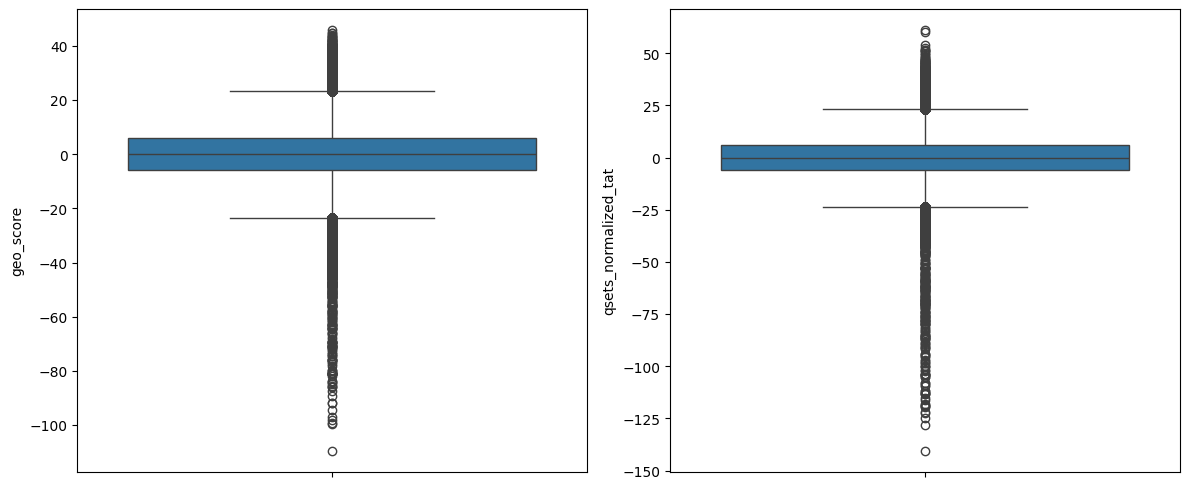

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=geo['geo_score'])
plt.subplot(1,2,2)
sns.boxplot(y=qset['qsets_normalized_tat'])
plt.tight_layout()

### Observation 
- both has outlier so imputed with median 

In [9]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [10]:
print('Geo \n',geo.isnull().sum()/len(geo)* 100)
print('*********************')
print('qset \n',qset.isnull().sum()/len(qset)* 100)

Geo 
 id           0.0
geo_score    0.0
dtype: float64
*********************
qset 
 id                      0.0
qsets_normalized_tat    0.0
dtype: float64


## Unique Customer ID

In [11]:
print('Geo ',geo['id'].nunique())
print('*********************')
print('instance ',instance['id'].nunique())
print('*********************')
print('qset ',qset['id'].nunique())
print('*********************')
print('test  ',test['id'].nunique())
print('*********************')
print('train ',train['id'].nunique())
print('*********************')

Geo  284807
*********************
instance  284807
*********************
qset  284807
*********************
test   56962
*********************
train  227845
*********************


## Unique Group of Customer

In [12]:
print('lamda ',lamda['Group'].nunique())
print('*********************')
print('test ',test['Group'].nunique())
print('*********************')
print('train ',train['Group'].nunique())
print('*********************')

lamda  1400
*********************
test  915
*********************
train  1301
*********************


### Observation
- no. of unique id in train (227845) + test(56962) =  284807 which 
is exectly equal to no. of unique id in geo and instaces 284807
- So we merge the train and test 

## Merge both train and test dataset

- of sepration we add the data column in both trian and test datasets (common column)

In [13]:
train['data'] = 'train'
test['data'] = 'test'

In [14]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [15]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [16]:
# add the train and test row wise
all_data = pd.concat([train , test] , axis=0)

In [17]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train


In [18]:
all_data.shape

(284807, 29)

## now we can add the geo , instance , qset dataset into the all_data

In [19]:
print('Geo ',geo['id'].nunique())
print('*********************')
print('instance ',instance['id'].nunique())
print('*********************')
print('qset ',qset['id'].nunique())
print('*********************')
print('all_data  ',all_data['id'].nunique())

Geo  284807
*********************
instance  284807
*********************
qset  284807
*********************
all_data   284807


## now we can add the lamda dataset into the all_data

In [20]:
print('lamda ',lamda['Group'].nunique())
print('*********************')
print('all_data ',all_data['Group'].nunique())


lamda  1400
*********************
all_data  1400


## Merge lamda to all_data (left join)

In [21]:
all_data = pd.merge(all_data ,lamda  ,on='Group' , how='left')

In [22]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60


## Merge geo , instance , qset on to the all_data

In [23]:
all_data.shape

(284807, 30)

In [24]:
geo.shape , instance.shape , qset.shape

((1424035, 2), (1424035, 2), (1424035, 2))

#### Observation 
- all_data contain unique customer details 
and in geo , instance and  qset contain the customer details which has multiple transactions 
- we need to groupby id to the geo , instance and  qset and calucate the mean of this transacition 
- so the we get the unique customer details and then we merge to the all_data dataset

In [25]:
geo = geo.groupby('id').mean()
instance = instance.groupby('id').mean()
qset = qset.groupby('id').mean()

In [26]:
geo.shape , instance.shape , qset.shape , all_data.shape

((284807, 1), (284807, 1), (284807, 1), (284807, 30))

In [27]:
all_data = pd.merge(all_data ,geo  ,on='id' , how='left')

In [28]:
all_data = pd.merge(all_data ,instance  ,on='id' , how='left')

In [29]:
all_data = pd.merge(all_data ,qset  ,on='id' , how='left')

In [30]:
all_data.shape

(284807, 33)

## Biferget the data into train and uncess data (test data for prediction )
- On the basis of the data variable

In [31]:
train = all_data[all_data['data'] == 'train']
unseen_data = all_data[all_data['data'] == 'test']

In [32]:
train.shape

(227845, 33)

In [33]:
unseen_data.shape

(56962, 33)

## Droping the unnecessary column from train and unseen_data

In [34]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [35]:
train.drop(columns=['id' , 'data'] , inplace=True)

In [36]:
train.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [37]:
unseen_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [38]:
unseen_data.drop(columns=['id' , 'data' , 'Target'] , inplace=True)

In [39]:
unseen_data.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

## Encoding (LableEncoder)

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['Group'] = encoder.fit_transform(train['Group'])
unseen_data['Group'] = encoder.fit_transform(unseen_data['Group'])

## Split the data into independent and dependent variable

In [41]:
x = train.drop(['Target'] , axis=1)     #independent
y = train['Target']                     #dependent 

In [42]:
x.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

## Imbalance Data 
- we have 2 lakh plus data so we not using SMOTE instade we us statify

In [43]:
y.value_counts(normalize=True)

Target
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

## Split data into training and testing 

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x ,y , test_size=0.3  , random_state=42 , stratify=y)

In [45]:
y_train.value_counts()

Target
0.0    159215
1.0       276
Name: count, dtype: int64

In [46]:
y_test.value_counts()

Target
0.0    68236
1.0      118
Name: count, dtype: int64

## Building the Models

In [47]:
from sklearn.ensemble import RandomForestClassifier , IsolationForest
rforest = RandomForestClassifier()
rforest.fit(x_train ,  y_train)

RandomForestClassifier()

In [48]:
isoforest = IsolationForest()
isoforest.fit(x_train, y_train)

IsolationForest()

In [49]:
ypred_train_rf = rforest.predict(x_train)
ypred_test_rf = rforest.predict(x_test)

ypred_train_iso = isoforest.predict(x_train)
ypred_test_iso = isoforest.predict(x_test)

## RandomForest evaluation 

In [50]:
from sklearn.metrics import classification_report  ,accuracy_score , confusion_matrix

print(classification_report(y_train , ypred_train_rf))
print("********************************************************************************")
print(classification_report(y_test , ypred_test_rf))

print(accuracy_score(y_train , ypred_train_rf))
print("********************************************************************************")
print(accuracy_score(y_test , ypred_test_rf))

print("********************************************************************************")

print(confusion_matrix(y_train , ypred_train_rf))
print("********************************************************************************")
print(confusion_matrix(y_test , ypred_test_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159215
         1.0       1.00      1.00      1.00       276

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491

********************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68236
         1.0       0.96      0.78      0.86       118

    accuracy                           1.00     68354
   macro avg       0.98      0.89      0.93     68354
weighted avg       1.00      1.00      1.00     68354

1.0
********************************************************************************
0.9995611083477193
********************************************************************************
[[159215      0]
 [     0    276]]
*********************************************

## Cross validation 

In [51]:
# from sklearn.model_selection import cross_val_score
# training = cross_val_score(rforest , x_train ,y_train , cv=5)
# training.mean()

## IsolationForest Evaluation

In [52]:
print(classification_report(y_train , ypred_train_iso))
print("********************************************************************************")
print(classification_report(y_test , ypred_test_iso))

print(accuracy_score(y_train , ypred_train_iso))
print("********************************************************************************")
print(accuracy_score(y_test , ypred_test_iso))

print("********************************************************************************")

print(confusion_matrix(y_train , ypred_train_iso))
print("********************************************************************************")
print(confusion_matrix(y_test , ypred_test_iso))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    159215
         1.0       0.00      0.18      0.00       276

    accuracy                           0.00    159491
   macro avg       0.00      0.06      0.00    159491
weighted avg       0.00      0.00      0.00    159491

********************************************************************************
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     68236
         1.0       0.00      0.18      0.00       118

    accuracy                           0.00     68354
   macro avg       0.00      0.06      0.00     68354
weighted avg       0.00      0.00      0.00     68354

0.0003197672595945853
********************************************************************************
0.00030722415659654155
*******************************

In [54]:
final_output = rforest.predict(unseen_data)

In [56]:
final_output = pd.DataFrame(final_output , columns=['Target'])

In [57]:
final_output.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [58]:
final_output.to_csv('Final_Target_values.csv')